<a href="https://colab.research.google.com/github/wanerge/Parcial1-EstrucDatos/blob/main/Parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller Parcial 1
*Estructura de Datos, 2024-2*

Nombre Equipo: W sin Yandel

Integrantes:

1. Wanerge Almanza Velasquez - CC 1039472769 - grupo 02


##Objetivos

* Aplicación práctica: Realizar la implementación de 15 algoritmos de ordenamiento.
*   Análisis de rendimiento: Evaluar la eficiencia de diferentes métodos de ordenamiento en un contexto real.
* Extracción de conclusiones: Llegar a conclusiones sobre el comportamiento de los algoritmos en función de los datos y el contexto.

##Base Datos

link: https://www.kaggle.com/datasets/valakhorasani/best-books-of-the-decade-2020s

**Los mejores libros de la década de los 2020**

Una recopilación de los 2329 libros más leídos de la década de 2020 según las calificaciones de los usuarios y su popularidad. Las columnas incluyen:

* Índice: Identificador único de cada libro.
* Nombre del libro: El título del libro.
* Autor: El(los) autor(es) del libro.
* Calificación: Calificación promedio de los usuarios (en una escala de 1 a 5).
* Número de Votos: Número total de votos que recibió el libro.
* Puntuación: Una puntuación agregada calculada en base a calificaciones y votos.

Este conjunto de datos es ideal para explorar las tendencias de popularidad de los libros, las preferencias de los usuarios y crear sistemas de recomendación.

##Indicaciones
* Los algoritmos estan implementados en cajas como en la siguiente imagen.

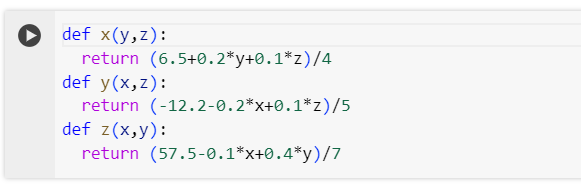
* Cada vez que se explore el documento y se encuentre con cada una de estas cajas se debe dar clic una sola vez en el triángulo de reproducción señalado a continuación.

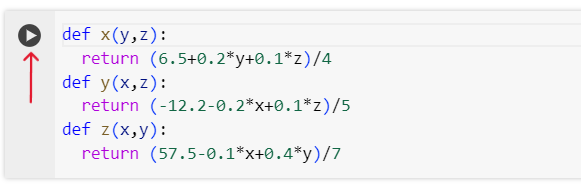

* El orden de exploración se hace de arriba hacia abajo y en ese mismo orden se da clic a cada una de las cajas.

* No hay que realizar alguna importación, la base de datos se importa desde GitHub.

##Cuerpo de trabajo

###Carga, limpieza y organizacion de la base de datos

La carga de la base de datos(BD) se hace por medio de una url que apunta a la BD alojada en el repositorio del trabajo en GitHut. Luego se reorganizan las columnas y se limpian los datos para una mayor accesibilidad a estos.

In [ ]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/wanerge/Parcial1-EstrucDatos/refs/heads/main/books_of_the_decade.csv'
df = pd.read_csv(url)
#df = pd.read_csv("books_of_the_decade.csv")
df.set_index('Index', inplace=True)
df.reset_index(drop=True, inplace=True)
df.columns = ['BookName', 'Author', 'Rating', 'NumberVotes', 'Score']
#np.unique(df['Rating'])
#df['Rating'].str.extract(r'(\d+\.\d+|\d+)').astype(float).dtypes
df['Rating'] = df['Rating'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
#np.unique(df['NumberVotes'])
#df['NumberVotes'].str.replace(",", "").replace("1 rating", "2100000").astype(int).dtypes
df['NumberVotes'] = df['NumberVotes'].str.replace(",", "").replace("1 rating", "1").astype(int)
df.head()

,BookName,Author,Rating,NumberVotes,Score
0,The Invisible Life of Addie LaRue,Victoria Schwab,4.18,1184531,62443
1,The House in the Cerulean Sea (Cerulean Chroni...,T.J. Klune,4.40,718243,47323
2,Project Hail Mary,Andy Weir,4.51,657869,45972
3,The Midnight Library,Matt Haig,3.99,1967348,42746
4,I'm Glad My Mom Died,Jennette McCurdy,4.46,1151831,37509


###Algoritmos de ordenamiento
En esta sección se realiza la implementación de 15 algoritmos de ordenamiento listados a continuación:

* Bubble Sort
* Bubble Sort Mejorado
* Cocktail Sort
* Selection Sort
* Insertion Sort
* Shell Sort
* Merge Sort
* Quick Sort
* Radix Sort
* Gnome Sort
* Bucket Sort (Metodo Unico)
* American Flag Sort
* Sample Sort
* K-way Merge Sort
* Ninja Sort


In [ ]:
def bubble_sort(arr): #Ordenamiento burbuja
    n = len(arr)
    # Pasar por todos los elementos del array
    for i in range(n):
        # Últimos i elementos ya están en su lugar
        for j in range(0, n-i-1):
            # Si el elemento encontrado es mayor que el siguiente
            if arr[j] < arr[j+1]:
                # Intercambiar los elementos
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

#------------------------------------------------------------------------------------------------------------------

def bubble_sort_mejorado(arr): #Ordenamiento burbuja mejorado
    n = len(arr)
    # Variable para verificar si se realizaron intercambios
    intercambio = True
    # Pasar por todos los elementos del array
    for i in range(n):
        # Si no se realizaron intercambios en la pasada, la lista ya está ordenada
        if not intercambio:
            break
        intercambio = False
        # Comparar elementos adyacentes
        for j in range(0, n-i-1):
            if arr[j] < arr[j+1]:
                # Intercambiar los elementos
                arr[j], arr[j+1] = arr[j+1], arr[j]
                intercambio = True
    return arr

#------------------------------------------------------------------------------------------------------------------

def cocktail_sort(arr): #Ordenamiento tipo cóctel
    n = len(arr)
    inicio = 0
    fin = n - 1
    intercambio = True
    while intercambio:
        intercambio = False
        # Pasada de izquierda a derecha
        for i in range(inicio, fin):
            if arr[i] < arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                intercambio = True
        # Si no hubo intercambios, la lista ya está ordenada
        if not intercambio:
            break
        # Reducir el fin para la siguiente pasada
        fin -= 1
        intercambio = False
        # Pasada de derecha a izquierda
        for i in range(fin, inicio - 1, -1):
            if arr[i] < arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                intercambio = True
        # Aumentar el inicio para la siguiente pasada
        inicio += 1
    return arr

#------------------------------------------------------------------------------------------------------------------

def selection_sort(arr): #Ordenamiento por selección
    n = len(arr)
    # Pasar por todos los elementos del array
    for i in range(n):
        # Encontrar el índice del elemento maximo en el subarray no ordenado
        max_idx = i
        for j in range(i + 1, n):
            if arr[j] > arr[max_idx]:
                max_idx = j
        # Intercambiar el elemento maximo encontrado con el primer elemento no ordenado
        arr[i], arr[max_idx] = arr[max_idx], arr[i]
    return arr

#------------------------------------------------------------------------------------------------------------------

def insertion_sort(arr): #Ordenamiento por inserción
    # Pasar por cada elemento del array
    for i in range(1, len(arr)):
        clave = arr[i]
        j = i - 1
        # Mover los elementos del array que son menores que la clave
        # hacia una posición adelante de su posición actual
        while j >= 0 and arr[j] < clave:
            arr[j + 1] = arr[j]
            j -= 1

        # Colocar la clave en su posición correcta
        arr[j + 1] = clave
    return arr

#------------------------------------------------------------------------------------------------------------------

def shell_sort(arr): #Ordenamiento por concha
    n = len(arr)
    # Comenzar con un gran intervalo y reducir el intervalo
    intervalo = n // 2

    # Continuar mientras el intervalo sea mayor que 0
    while intervalo > 0:
        # Realizar una inserción a intervalo
        for i in range(intervalo, n):
            clave = arr[i]
            j = i

            # Mover los elementos que están a intervalo posiciones delante
            # de la clave hacia adelante si son mayores que la clave
            while j >= intervalo and arr[j - intervalo] < clave:
                arr[j] = arr[j - intervalo]
                j -= intervalo

            # Colocar la clave en su posición correcta
            arr[j] = clave

        # Reducir el intervalo
        intervalo //= 2
    return arr

#------------------------------------------------------------------------------------------------------------------

def merge_sort(arr): #Ordenamiento por fusión
    # Si el tamaño del array es menor o igual a 1, ya está ordenado
    if len(arr) <= 1:
        return arr

    # Dividir el array en dos mitades
    mid = len(arr) // 2
    izquierda = merge_sort(arr[:mid])
    derecha = merge_sort(arr[mid:])

    # Combinar las dos mitades ordenadas
    return merge(izquierda, derecha)

def merge(izquierda, derecha):
    resultado = []
    i = j = 0

    # Combinar las dos listas
    while i < len(izquierda) and j < len(derecha):
        if izquierda[i] > derecha[j]:
            resultado.append(izquierda[i])
            i += 1
        else:
            resultado.append(derecha[j])
            j += 1

    # Agregar los elementos restantes
    resultado.extend(izquierda[i:])
    resultado.extend(derecha[j:])

    return resultado

#------------------------------------------------------------------------------------------------------------------

def quick_sort(arr): #Ordenamiento rápido con pivote fijo
    if len(arr) <= 1:
        return arr
    else:
        # Elegir un pivote, aquí se elige el último elemento
        pivote = arr[-1]
        izquierda = [x for x in arr[:-1] if x > pivote]
        derecha = [x for x in arr[:-1] if x <= pivote]

        # Recursivamente aplicar Quick Sort y combinar resultados
        return quick_sort(izquierda) + [pivote] + quick_sort(derecha)

#------------------------------------------------------------------------------------------------------------------

def radix_sort(arr): #Ordenamiento por base
    max_num = max(arr)
    exp = 1
    while max_num // exp > 0:
        buckets = [[] for _ in range(10)]
        for num in arr:
            digit = (num // exp) % 10
            buckets[digit].append(num)
        # Invertir el orden de los buckets para el orden descendente
        arr = []
        for i in range(9, -1, -1):
            arr.extend(buckets[i])
        exp *= 10
    return arr

#------------------------------------------------------------------------------------------------------------------

def gnome_sort(arr): #Ordenamiento tipo gnomo
    index = 0
    n = len(arr)

    while index < n:
        if index == 0:
            index += 1
        if arr[index] <= arr[index - 1]:
            index += 1
        else:
            # Intercambiar los elementos
            arr[index], arr[index - 1] = arr[index - 1], arr[index]
            index -= 1
    return arr

#------------------------------------------------------------------------------------------------------------------

def bucket_sort(arr): #clasificación por cubos
    bucket_count = len(arr)
    max_value = max(arr)
    # Crear los buckets
    buckets = [[] for _ in range(bucket_count)]
    # Distribuir los elementos en los buckets
    for i in range(len(arr)):
        index = int((arr[i] / max_value) * (bucket_count - 1))
        buckets[index].append(arr[i])
    # Ordenar cada bucket (aquí usamos insertion sort)
    for i in range(bucket_count):
        buckets[i].sort(reverse=True)
    # Concatenar los buckets en orden inverso
    sorted_arr = []
    for i in range(bucket_count - 1, -1, -1):
        sorted_arr.extend(buckets[i])

    return sorted_arr

#------------------------------------------------------------------------------------------------------------------

def american_flag_sort(arr): #Ordenamiento tipo bandera americana
    if len(arr) == 0:
        return arr
    # Determinar el valor mínimo y máximo
    min_val = min(arr)
    max_val = max(arr)
    # Crear un rango de buckets
    bucket_count = max_val - min_val + 1
    buckets = [0] * bucket_count
    # Contar la ocurrencia de cada valor
    for num in arr:
        buckets[num - min_val] += 1
    # Rehacer el array ordenado a partir de los buckets en orden descendente
    index = 0
    for i in range(bucket_count - 1, -1, -1):  # Iterar de atrás hacia adelante
        while buckets[i] > 0:
            arr[index] = i + min_val
            index += 1
            buckets[i] -= 1

    return arr

#------------------------------------------------------------------------------------------------------------------

def sample_sort(arr, num_samples=10): #Ordenamiento por muestra
    if len(arr) == 0:
        return arr

    # Tomar muestras del array, corregir para no exceder el tamaño del array
    # Se usa min para asegurar que num_samples no sea mayor que la longitud de arr
    samples = sorted(arr)[:min(num_samples, len(arr))]

    # Crear buckets
    buckets = [[] for _ in range(len(samples) + 1)]  # Corregir para usar len(samples)

    # Distribuir elementos en los buckets
    for num in arr:
        placed = False
        for i in range(len(samples)):  # Corregir para usar len(samples)
            if num < samples[i]:
                buckets[i].append(num)
                placed = True
                break
        if not placed:
            buckets[len(samples)].append(num)  # Corregir para usar len(samples)

    # Ordenar cada bucket y concatenar

    for i in buckets:
        i.sort(reverse=True)  # This line sorts each bucket in descending order
    sorted_arr = []
    for i in range(len(buckets) - 1, -1, -1):  # This loop iterates through the buckets in reverse order
        sorted_arr.extend(buckets[i])  # This line extends the sorted_arr with the elements of the current bucket

    return sorted_arr # Retornar el array ordenado

#------------------------------------------------------------------------------------------------------------------

import math
from heapq import heappop, heappush

def k_way_merge_sort(arr, k=3): #Ordenamiento por fusión en k formas
    if len(arr) < 2:
        return arr

    # Dividir el array en k partes
    subarrays = [arr[i:i + math.ceil(len(arr) / k)] for i in range(0, len(arr), math.ceil(len(arr) / k))]

    # Ordenar cada subarray de forma recursiva
    sorted_subarrays = [k_way_merge_sort(subarray, k) for subarray in subarrays]

    # Fusionar los subarrays ordenados
    return merge_k_sorted(sorted_subarrays)

def merge_k_sorted(sorted_arrays):
    heap = []
    result = []

    # Agregar el primer elemento de cada subarray al heap
    for i, sorted_array in enumerate(sorted_arrays):
        if sorted_array:  # Solo si el subarray no está vacío
            heappush(heap, (-sorted_array[0], i, 0))  # Negar para orden descendente

    # Extraer el elemento más grande del heap y agregarlo al resultado
    while heap:
        value, array_index, element_index = heappop(heap)
        result.append(-value)  # Negar para obtener el valor original

        # Si hay más elementos en el subarray, agregarlos al heap
        if element_index + 1 < len(sorted_arrays[array_index]):
            next_value = sorted_arrays[array_index][element_index + 1]
            heappush(heap, (-next_value, array_index, element_index + 1))  # Negar para orden descendente

    return result

#------------------------------------------------------------------------------------------------------------------

import random

def ninja_sort(arr): #Ordenamiento rápido con pivote aleatorio
    if len(arr) <= 1:
        return arr

    # Elegir un pivote aleatorio
    pivot = random.choice(arr)

    # Dividir el array en tres partes
    less_than = [x for x in arr if x > pivot]
    equal = [x for x in arr if x == pivot]
    greater_than = [x for x in arr if x < pivot]

    # Recursivamente ordenar las partes y combinar
    return ninja_sort(less_than) + equal + ninja_sort(greater_than)

###Tiempos de Ejecución
Tomaremos los numeros de votos de los 2329 libros que hay en la base de datos, y se calculara el tiempo de ejecucion de cada algoritmo de ordenamiento sobre los numeros de votos.
Para evitar que cada algoritmo tome una lista ya ordenada se realiza una copia de la original.

In [ ]:
import time

diccionario = { "bubble_sort": bubble_sort,
                "bubble_sort_mejorado": bubble_sort_mejorado,
                "cocktail_sort": cocktail_sort,
                "selection_sort": selection_sort,
                "insertion_sort": insertion_sort,
                "shell_sort": shell_sort,
                "merge_sort": merge_sort,
                "quick_sort": quick_sort,
                "radix_sort": radix_sort,
                "gnome_sort": gnome_sort,
                "bucket_sort": bucket_sort,
                "american_flag_sort": american_flag_sort,
                "sample_sort": sample_sort,
                "k_way_merge_sort": k_way_merge_sort,
                "ninja_sort": ninja_sort
                }

tiemposEjecucion = {'Algoritmo':[], 'Tiempo': [], 'Lista':[]}
for i, j in diccionario.items():
  #print("%25s"%i+": ", j([random.randint(1, 100) for _ in range(10)]))
  lista = df['NumberVotes'].tolist().copy()
  start_time = time.time() # Captura el tiempo inicial
  lista = j(lista)
  end_time = time.time() # Captura el tiempo final
  tiemposEjecucion['Algoritmo'].append(i)
  tiemposEjecucion['Tiempo'].append(end_time - start_time)
  tiemposEjecucion['Lista'].append(lista)
  #print("%25s"%i+": ", end_time - start_time ,lista[:k])

###Resultados
Se organiza la informacion en un dataframe y se imprime en pantalla. Como cada lista tiene muchos registros el lenguaje solo muestra los primeros que hay en la lista.

**Nota:** cada vez que se realicen los tiempos de ejecución, estos tienen una pequeña variación, pero no afectara a las conclusiones ya que tendrán el mismo resultado, pero con una desviación.

In [ ]:
import pandas as pd
import numpy as np

tabla = pd.DataFrame(tiemposEjecucion)
tabla

,Algoritmo,Tiempo,Lista
0,bubble_sort,0.468655,"[2071618, 1967348, 1750185, 1601523, 1513373, ..."
1,bubble_sort_mejorado,0.469982,"[2071618, 1967348, 1750185, 1601523, 1513373, ..."
2,cocktail_sort,0.346600,"[2071618, 1967348, 1750185, 1601523, 1513373, ..."
3,selection_sort,0.229148,"[2071618, 1967348, 1750185, 1601523, 1513373, ..."
4,insertion_sort,0.165118,"[2071618, 1967348, 1750185, 1601523, 1513373, ..."
5,shell_sort,0.009087,"[2071618, 1967348, 1750185, 1601523, 1513373, ..."
6,merge_sort,0.008569,"[2071618, 1967348, 1750185, 1601523, 1513373, ..."
7,quick_sort,0.005112,"[2071618, 1967348, 1750185, 1601523, 1513373, ..."
8,radix_sort,0.002302,"[2071618, 1967348, 1750185, 1601523, 1513373, ..."
9,gnome_sort,0.501694,"[2071618, 1967348, 1750185, 1601523, 1513373, ..."


En este caso separamos cada elemento de la lista en una columna, así podemos observar los elementos de cada lista de acuerdo con un rango establecido. El rango se establece de acuerdo a lo siguientes parametros:

inicial-> indica el elemento inicial desde el cual la lista comenzara.

final-> indica el elemento final donde la lista terminara.

ejemplo: inicial = 0, final = 10. La lista mostrara los primeros 10 elementos.

ejemplo: inicial = 2319, final = 2329. La lista mostrara los ultimos 10 elementos.

recordatorio: la lista tiene 2329 elementos.

**sugerencia:** los valores inicial y final se pueden modificar, y se puede volver a ejecutar la caja(algoritmo) para visualizar la modificación.

In [ ]:
import pandas as pd
import numpy as np

inicial = 0
final = 10

# Create a DataFrame from the 'Lista' column, taking the first k elements of each list
lista_df = tabla['Lista'].apply(lambda x: x[inicial:final]).apply(pd.Series)
# Rename columns to avoid conflicts and for clarity
lista_df.columns = [f'Top_{i+1}' for i in range(final-inicial)]

# Now merge based on index using 'left_index' and 'right_index'
merged_tabla = pd.merge(tabla[['Algoritmo','Tiempo']], lista_df, left_index=True, right_index=True)
merged_tabla

,Algoritmo,Tiempo,Top_1,Top_2,Top_3,Top_4,Top_5,Top_6,Top_7,Top_8,Top_9,Top_10
0,bubble_sort,0.468655,2071618,1967348,1750185,1601523,1513373,1444923,1440061,1384554,1334026,1304135
1,bubble_sort_mejorado,0.469982,2071618,1967348,1750185,1601523,1513373,1444923,1440061,1384554,1334026,1304135
2,cocktail_sort,0.346600,2071618,1967348,1750185,1601523,1513373,1444923,1440061,1384554,1334026,1304135
3,selection_sort,0.229148,2071618,1967348,1750185,1601523,1513373,1444923,1440061,1384554,1334026,1304135
4,insertion_sort,0.165118,2071618,1967348,1750185,1601523,1513373,1444923,1440061,1384554,1334026,1304135
5,shell_sort,0.009087,2071618,1967348,1750185,1601523,1513373,1444923,1440061,1384554,1334026,1304135
6,merge_sort,0.008569,2071618,1967348,1750185,1601523,1513373,1444923,1440061,1384554,1334026,1304135
7,quick_sort,0.005112,2071618,1967348,1750185,1601523,1513373,1444923,1440061,1384554,1334026,1304135
8,radix_sort,0.002302,2071618,1967348,1750185,1601523,1513373,1444923,1440061,1384554,1334026,1304135
9,gnome_sort,0.501694,2071618,1967348,1750185,1601523,1513373,1444923,1440061,1384554,1334026,1304135


##Conclusiones
De acuerdo a los resultados obtenidos podemos concluir que:

1. Los algoritmos más eficientes en términos de tiempo de ejecución son radix_sort (0.002302 segundos) y bucket_sort (0.002348 segundos), lo que sugiere que son adecuados para manejar grandes volúmenes de datos.
2. Los algoritmos como radix_sort y bucket_sort son ejemplos de algoritmos de ordenamiento no comparativos que son significativamente más rápidos que los basados en comparación, como bubble_sort y gnome_sort.
3. Al igual que los algoritmos basados en comparación, los no comparativos(radix_sort y bucket_sort) también demuestran mayor rapidez que algoritmos recursivos como merge_sort y quick_sort.
4. Aunque american_flag_sort es un algoritmo no comparativo al igual que radix_sort y bucket_sort, este demuestra no ser tan eficiente como los mencionados, lo que nos indica que dependiendo de la estrategia establecida al momento de diseñar el algoritmo esta puede influir mucho en el desempeño del resultado.
5. Algunos algoritmo como selection_sort (0.229148 segundos) y cocktail_sort (0.346600 segundos) y otros, son significativamente más lentos que otros algoritmos de ordenación más avanzados, indicando que su uso debería ser evitado en aplicaciones donde la eficiencia es crítica.
6. La elección del algoritmo de ordenación debe basarse en el contexto específico, incluyendo el tamaño de los datos, su estructura y la necesidad de eficiencia en tiempo, lo que resalta la importancia de analizar diferentes algoritmos para diferentes escenarios.
7. De acuerdo a los datos obtenidos podemos observar que la mayor cantidad de votos que obtuvo el libro mas votado fue de 2071618 votos.